# Benchmark

In [347]:
# Settings
root_dir = '/home/dennis/VILLASnode/tests/benchmarks'
benchmark_dir = 'benchmarks_20180803_11-43-33'

## Load all files
### Results
...

### Source log
...

In [348]:
import numpy as np
import os
import re

# First, source log

# Initialize arrays
files_array = []
input_paths = []
input_array = []
output_paths = []
output_array = []

# Save complete path of files in an array
for subdir, dirs, files in os.walk(root_dir+'/'+benchmark_dir):
    for file in files:
        # Regex to match .csv files
        if re.match(r'.*?_input.csv', file, re.M|re.I):
            input_paths.append(os.path.join(subdir, file))
        # Regex to match .log files
        elif re.match(r'.*?_output.csv', file, re.M|re.I):
            output_paths.append(os.path.join(subdir, file))
        
    filles_array = files

# INPUT
# Loop through array with result files and save the comma separated data into a new array
for file in input_paths:
    print("Loaded input file: {}".format(file))
    
    # Load file 
    input_array.append(np.genfromtxt(file, delimiter=','))
    
# OUTPUT
# Loop through array with result files and save the comma separated data into a new array
for file in output_paths:
    print("Loaded output file: {}".format(file))
    
    # Load file 
    output_array.append(np.genfromtxt(file, delimiter=','))

# Small sanity check, are arrays of the same size?
if len(input_array) != len(output_array):
    print("Error: There should be as many input files as there are output files!")
    exit();

Loaded input file: /home/dennis/VILLASnode/tests/benchmarks/benchmarks_20180803_11-43-33/0_TCP-3-50000-500000_input.csv
Loaded input file: /home/dennis/VILLASnode/tests/benchmarks/benchmarks_20180803_11-43-33/1_UDP-3-50000-500000_input.csv
Loaded output file: /home/dennis/VILLASnode/tests/benchmarks/benchmarks_20180803_11-43-33/0_TCP-3-50000-500000_output.csv
Loaded output file: /home/dennis/VILLASnode/tests/benchmarks/benchmarks_20180803_11-43-33/1_UDP-3-50000-500000_output.csv


## Save characteristics of tests
All important settings are contained in the name of the file. We will save them in a separate array. The structure of the name is as follows:

```bash
root_dir/benchmarks_${DATE}/${ID}_${MODE}-${VALUES IN SMP}-${RATE}-${SENT SMPS}
```

Thus, we will structure it in the settings_array as follows:

* `settings_array[*][0] = ID`
* `settings_array[*][1] = MODE`
* `settings_array[*][2] = VALUES IN SAMPLE`
* `settings_array[*][3] = RATE`
* `settings_array[*][4] = TOTAL NUMBER OF SAMPLES`

In [349]:
# Array with settings
settings_array = []

for file in output_paths:
    settings = []
    
    matchObj = re.match(r'.*?(\d*)_(\w*)-(\d*)-(\d*)-(\d*)_output.csv', file, re.M|re.I)

    # Fill values to array
    if matchObj:
        for i in range(0,5):
            settings.append(matchObj.group(i+1))
    
        # Append array to big array
        settings_array.append(settings)
        
        print(settings)

['0', 'TCP', '3', '50000', '500000']
['1', 'UDP', '3', '50000', '500000']


## Get missed steps from source node
...

In [350]:
# Number of missing samples at receive side
missed_send_arr = []
# Percentage of missed samples
perc_miss_send_arr = []

# Generate real total and number of missing samples.
# Print percentage of missed samples
for (i, csv_vec) in enumerate(input_array):
    # Get number of missing samples
    missed_send_arr.append(int(settings_array[i][4]) - len(csv_vec))
    
    # Take percentage
    perc_miss_send_arr.append(round(missed_send_arr[i] / int(settings_array[i][4]) * 100, 2))
    
    print("Test {} missed {} ({}%) of {} samples that were intended to send at the send side."
          .format(settings_array[i][0], missed_send_arr[i], perc_miss_send_arr[i], settings_array[i][4]))

Test 0 missed 1784 (0.36%) of 500000 samples that were intended to send at the send side.
Test 1 missed 1930 (0.39%) of 500000 samples that were intended to send at the send side.


## Get missed steps from destination node
...

In [351]:
# Number of missing samples at receive side
missed_recv_arr = []
# Percentage of missed samples
perc_miss_recv_arr = []

# Generate real total and number of missing samples.
# Print percentage of missed samples
for (i, csv_vec) in enumerate(output_array):
    # Get number of missing samples
    missed_recv_arr.append(int(settings_array[i][4]) - len(csv_vec))
    
    # Take percentage
    perc_miss_recv_arr.append(round(missed_recv_arr[i] / int(settings_array[i][4]) * 100, 2))
    
    print("Test {} missed {} ({}%) of {} samples that were intended to send."
          .format(settings_array[i][0], missed_recv_arr[i], perc_miss_recv_arr[i], settings_array[i][4]))

Test 0 missed 2010 (0.4%) of 500000 samples that were intended to send.
Test 1 missed 2125 (0.43%) of 500000 samples that were intended to send.


## Check first and second sample from receive & destination node
...

In [352]:
# Check first and second sample
# INPUT
first_second_smp_input = []

for (i, csv_vec) in enumerate(input_array):
    first_second_smp_input.append([csv_vec[0][3], csv_vec[1][3]])
    print("First and second sample of test {}: {} and {}, respectively".format(settings_array[i][0],
                                                                               first_second_smp_input[i][0],
                                                                               first_second_smp_input[i][1]))

print("")
# OUTPUT
first_second_smp_output = []

for (i, csv_vec) in enumerate(output_array):
    first_second_smp_output.append([csv_vec[0][3], csv_vec[1][3]])
    print("First and second sample of test {}: {} and {}, respectively".format(settings_array[i][0],
                                                                               first_second_smp_output[i][0],
                                                                               first_second_smp_output[i][1]))
    

First and second sample of test 0: 0.0 and 1728.0, respectively
First and second sample of test 1: 0.0 and 1904.0, respectively

First and second sample of test 0: 1978.0 and 1979.0, respectively
First and second sample of test 1: 2123.0 and 2124.0, respectively


## Compare input and output data
...

In [353]:
missing_seq = []
never_trans_total_arr = []
never_trans_after_arr = []

perc_never_trans_total_arr = []
perc_never_trans_after_arr = []

# Small check if formats of arrays make sense
if len(input_array) < len(output_array):
    print("Error: Something went wrong! The length of the input array should always be bigger than or equal to the length of the output array")
    exit();
    
# Loop through input_array, since this is always bigger or equal to output array
for (i, csv_vec) in enumerate(input_array):
    k = 0
    missing_seq.append([])
    for (j, line) in enumerate(csv_vec):
        if line[3] != output_array[i][k][3]:
            missing_seq[i].append(line[3])
        else:
            k += 1
            
    never_trans_total_arr.append(len(missing_seq[i]))
    
    never_trans_after_arr.append(np.sum(missing_seq[i] > first_second_smp_output[i][0]))
    
    # Take percentage
    perc_never_trans_total_arr.append(round(never_trans_total_arr[i] / int(settings_array[i][4]) * 100, 2))
    perc_never_trans_after_arr.append(round(never_trans_after_arr[i] / int(settings_array[i][4]) * 100, 2))
            
    print("{} samples were never transferred ({}%)".format(never_trans_total_arr[i],
                                                           perc_never_trans_total_arr[i]))
    print("{} ({}%) of these errors occured after the first sample arrived at the receive side.".format(never_trans_after_arr[i],
                                                                                                        perc_never_trans_after_arr[i]))

    print("")

226 samples were never transferred (0.05%)
0 (0.0%) of these errors occured after the first sample arrived at the receive side.

195 samples were never transferred (0.04%)
0 (0.0%) of these errors occured after the first sample arrived at the receive side.



## Plot data
...

In [354]:
# Define Fancy Box function we use
def plot_fancy_box(bottom, height):
    top = bottom + height
    
    p = FancyBboxPatch((left, bottom),
                       width,
                       height,
                       boxstyle="round, pad=0.005",
                       
                       ec="#dbdbdb", 
                       fc="white", 
                       alpha=0.85,
                       transform=ax.transAxes
                      )
    
    ax.add_patch(p)

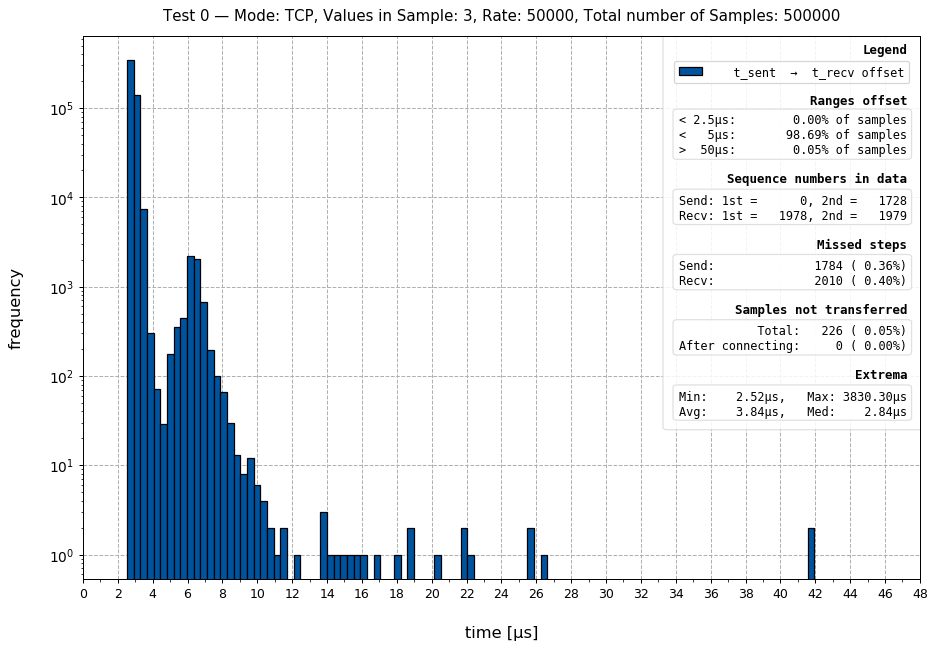

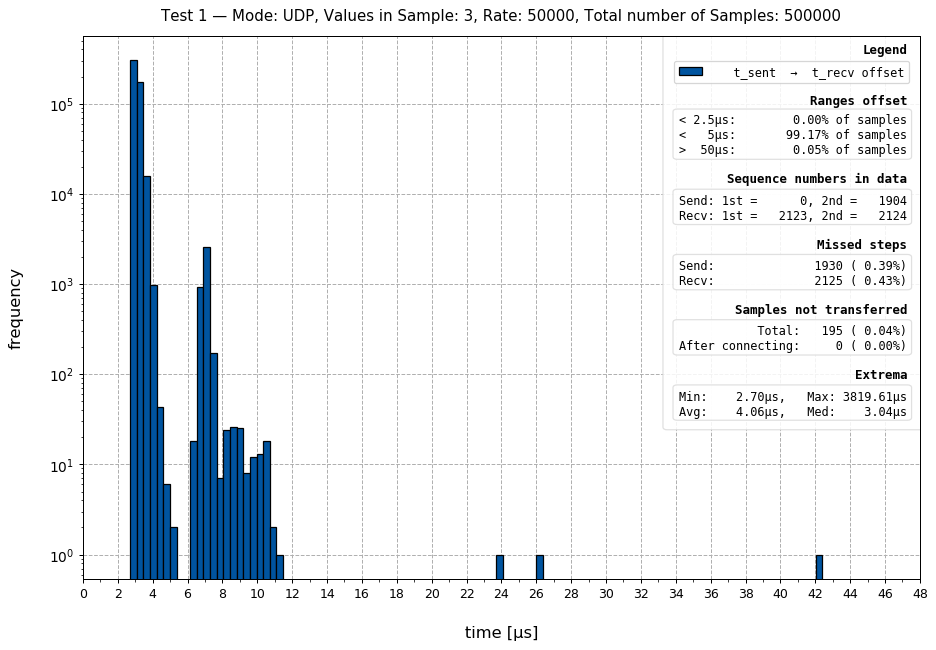

In [356]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.patches import FancyBboxPatch
import os

# Start creating plots
for (i, csv_vec) in enumerate(output_array):
    # Create figure
    fig = plt.figure(num=None, figsize=(12, 8), dpi=90, facecolor='w', edgecolor='k')

    # Add plot and set title
    ax = fig.add_subplot(111)
    
    # Set subtitle 
    title = "Test {} — Mode: {}, Values in Sample: {}, Rate: {}, Total number of Samples: {}".format(settings_array[i][0],
                                                                                                     settings_array[i][1], 
                                                                                                     settings_array[i][2], 
                                                                                                     settings_array[i][3], 
                                                                                                     settings_array[i][4])
    ax.set_title(title, fontsize=12, pad=12, loc='center')
    
    # Set grid
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--')

    bins = 10000
    x_limit=0.00005
    
    # Data in plot
    # http://www.color-hex.com/color-palette/33602
    csv_vec_t = csv_vec.transpose()
    
    ax.hist(csv_vec_t[2] * 1e6, label='   t_sent  →  t_recv offset',
            edgecolor='black',
            bins=bins,
            color='#00549f')

    # Set axis and calculate values above limit
    plt.xlim([0,x_limit])
       

    plt.xticks(np.arange(0, 50, 2), fontsize=10)
    from matplotlib.ticker import MultipleLocator
    minorLocator = MultipleLocator(1)
    ax.xaxis.set_minor_locator(minorLocator)
        
    plt.yticks(fontsize=11)

    # Labels
    ax.set_xlabel('time [µs]', fontsize=13, labelpad=20)
    ax.set_ylabel('frequency', fontsize=13, labelpad=20)
    ax.set_yscale('log')

    # Create text for offset
    off_smaller_2p5us  = round((np.size(csv_vec_t[2][csv_vec_t[2] < 0.0000025]) / np.size(csv_vec_t[2])) * 100, 2)
    off_smaller_5us = round((np.size(csv_vec_t[2][csv_vec_t[2] < 0.000005]) / np.size(csv_vec_t[2])) * 100, 2)
    off_bigger_50us = round((np.size(csv_vec_t[2][csv_vec_t[2] > x_limit]) / np.size(csv_vec_t[2])) * 100, 2)
    
    offset_text  = '< 2.5µs: {0:11.2f}% of samples\n'.format(off_smaller_2p5us)
    offset_text += '<   5µs: {0:11.2f}% of samples\n'.format(off_smaller_5us)
    offset_text += '>  50µs: {0:11.2f}% of samples'.format(off_bigger_50us)
    
    
    # First sequence numbers:
    start_nr_text  = 'Send: 1st = {0:6d}, 2nd = {1:6d}\n'.format(int(first_second_smp_input[i][0]),
                                                                 int(first_second_smp_input[i][1]))
    start_nr_text += 'Recv: 1st = {0:6d}, 2nd = {1:6d}'.format(int(first_second_smp_output[i][0]),
                                                               int(first_second_smp_output[i][1]))
    
       
    
    # Create text for missed steps
    missed_text  = 'Send: {0:17d} ({1:5.2f}%)\n'.format(missed_send_arr[i],
                                                          perc_miss_send_arr[i])
    missed_text += 'Recv: {0:17d} ({1:5.2f}%)'.format(missed_recv_arr[i],
                                                        perc_miss_recv_arr[i])
    
    # Create text for missed steps
    never_transferred_text  = '           Total: {0:5d} ({1:5.2f}%)\n'.format(never_trans_total_arr[i],
                                                                  perc_never_trans_total_arr[i])
    never_transferred_text += 'After connecting: {0:5d} ({1:5.2f}%)'.format(never_trans_after_arr[i],
                                                                            perc_never_trans_after_arr[i])
    
    # Create text for extrema
    extrema_text  = 'Min: {0:>7.2f}µs,   Max: {1:>7.2f}µs\n'.format(round(np.min(csv_vec_t[2]) * 1e6, 2),
                                                                   round(np.max(csv_vec_t[2]) * 1e6, 2))
    extrema_text += 'Avg: {0:>7.2f}µs,   Med: {1:>7.2f}µs'.format(round(np.average(csv_vec_t[2]) * 1e6, 2),
                                                                 round(np.median(csv_vec_t[2]) * 1e6, 2))
    
           
    # Set font properties for headers and text
    font_header = FontProperties()
    font_header.set_family('monospace')
    font_header.set_weight('bold')
    font_header.set_size(10)
    
    font_text = FontProperties()
    font_text.set_size(9.5)
    font_text.set_family('monospace')
        
    # Set box constraints for wrapper and plot wrapper
    left, width = .698, .305
    right = left + width
    
    plot_fancy_box(bottom = 0.28, height = 0.72)

    # Set box constraints for text boxes
    left, width = .710, .275
    right = left + width
    
    #Create legend
    ax.text(right, 0.985, "Legend",
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_header)

        
    ax.legend(loc=1, bbox_to_anchor=(0.994, 0.965), prop={'family':'monospace', 'size':'9.5'})

    
    # Offset boxes
    plot_fancy_box(bottom = 0.7775, height = 0.0825)
    
    ax.text(right, 0.892, "Ranges offset",
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_header)
    ax.text(right, 0.857, offset_text,
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_text)
    
    # Start Nr
    plot_fancy_box(bottom = 0.6575, height = 0.055)
    
    ax.text(right, 0.7475, "Sequence numbers in data",
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_header)
    ax.text(right, 0.7075, start_nr_text,
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_text)
    
    # Missed steps
    plot_fancy_box(bottom = 0.5375, height = 0.055)
    
    ax.text(right, 0.6275, "Missed steps",
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_header)
    ax.text(right, 0.5875, missed_text,
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_text)
    
    # Never transferred
    plot_fancy_box(bottom = 0.4175, height = 0.055)
    
    ax.text(right, 0.5075, "Samples not transferred",
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_header)
    ax.text(right, 0.4675, never_transferred_text,
            verticalalignment='top', 
            horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_text)
    
    # Extrema
    plot_fancy_box(bottom = 0.2975, height = 0.055)
    
    
    ax.text(right, 0.3875, "Extrema",
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_header)
    ax.text(right, 0.3475, extrema_text,
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontproperties = font_text)
   
    #Show plot
    plt.show()

    # Create plot dir
    plot_path = '{}/{}/plots'.format(root_dir, benchmark_dir)
    
    import os, errno

    try:
        os.makedirs(plot_path)
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise
    
    #Save plot
    fig.savefig('{}/{}_{}.png'.format(plot_path, settings_array[i][0], settings_array[i][1]))